# CA01: Exploratory Data Analysis – House Price Analysis

<i>
Efren Lopez, Dani Le, Luis Otero
<br>
BSAN 6070
<br>
January 22, 2024
</i>
<br> <br>

GitHub Links:
*   Dani: https://github.com/ledani-bu/ml
*   Efren: https://github.com/efrenlop01/CA01-EL
*   Luis: https://github.com/otero106/BSAN6070

<br> <br>
<img src = "https://www.yourmoney.com/wp-content/uploads/sites/3/2022/03/house-prices-scaled.jpg" alt = "image" width = 300 height = "auto">

## Table of Contents
* [Introduction](#intro)
* [Data Understanding](#part1)
    * [Loading the Data](#import_data)
    * [Exploring the Data](#explore_data)
    * [Data Viusalizations](#viz_data)
* [Pre-Processing](#part2)
* [Post Processing](#part3)

## Introduction <a class="anchor" id="intro"></a>

For this computer assignment, we will be inspecting and analyzing a dataset that contains records regarding house prices. This data provides values of various features that “might” be predictive of house prices. The goal of this exploratory data analysis is to thoroughly examine the structure and content of the dataset so that we can prepare it for future machine learning model building. Let's get into it!

## Data Understanding <a class="anchor" id="part1"></a>

The first part of our analysis involves accessing the house price dataset, viewing the schema, exploring the contents using tables and visualizations, and determining the overall quality of the data.

### Loading the Data (Luis) <a class="anchor" id="import_data"></a>

In [ ]:
%pip install missingno

In [ ]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas.plotting import scatter_matrix
import plotly.express as px
from sklearn.preprocessing import KBinsDiscretizer
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [ ]:
#loading the data
house_data = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')

### Exploring the Data (Luis)<a class="anchor" id="explore_data"></a>

In [ ]:
#view number of columns and rows of dataset
house_data.shape

(1460, 81)

In [ ]:
#view dataset columns along with their data types
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#first five rows of data
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
#check for missing values
house_data.isnull().sum()

In [ ]:
#list columns that have missing values along with the number of missing values
col_list = []
for col in house_data.columns:
  if house_data[col].isnull().any():
    col_list.append(col)
    print(col)
    print(house_data[col].isnull().sum(), "\n")

LotFrontage
259 

Alley
1369 

MasVnrType
8 

MasVnrArea
8 

BsmtQual
37 

BsmtCond
37 

BsmtExposure
38 

BsmtFinType1
37 

BsmtFinType2
38 

Electrical
1 

FireplaceQu
690 

GarageType
81 

GarageYrBlt
81 

GarageFinish
81 

GarageQual
81 

GarageCond
81 

PoolQC
1453 

Fence
1179 

MiscFeature
1406 



From the first look, we can see that there are 1460 rows and 81 columns in the dataset. Additionally, 19 columns appear to have missing data with PoolQC, MiscFeature, and Fence being the top three.

In [ ]:
#descriptive statistics of continuous columns
round(house_data.describe(), 2)

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count  1460.00      1460.0      1201.00    1460.00      1460.00      1460.00   
mean    730.50        56.9        70.05   10516.83         6.10         5.58   
std     421.61        42.3        24.28    9981.26         1.38         1.11   
min       1.00        20.0        21.00    1300.00         1.00         1.00   
25%     365.75        20.0        59.00    7553.50         5.00         5.00   
50%     730.50        50.0        69.00    9478.50         6.00         5.00   
75%    1095.25        70.0        80.00   11601.50         7.00         6.00   
max    1460.00       190.0       313.00  215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1452.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.69      443.64       46.55     567.24   
std        30.20         20.65      181.07      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      166.00      712.25        0.00     808.00   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1379.00     1460.00     1460.00   
mean           6.52        0.61      1978.51        1.77      472.98   
std            1.63        0.64        24.69        0.75      213.80   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1961.00        1.00      334.50   
50%            6.00        1.00      1980.00        2.00      480.00   
75%            7.00        1.00      2002.00        2.00      576.00   
max           14.00        3.00      2010.00        4.00     1418.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count     1460.00      1460.00        1460.00    1460.00      1460.00   
mean        94.24        46.66          21.95       3.41        15.06   
std        125.34        66.26          61.12      29.32        55.76   
min          0.00         0.00           0.00       0.00         0.00   
25%          0.00         0.00           0.00       0.00         0.00   
50%          0.00        25.00           0.00       0.00         0.00   
75%        168.00        68.00 

In [ ]:
#descriptive statistics of categorical columns
house_data.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

### Data Visualizations (Dani)<a class="anchor" id="viz_data"></a>

<Axes: >

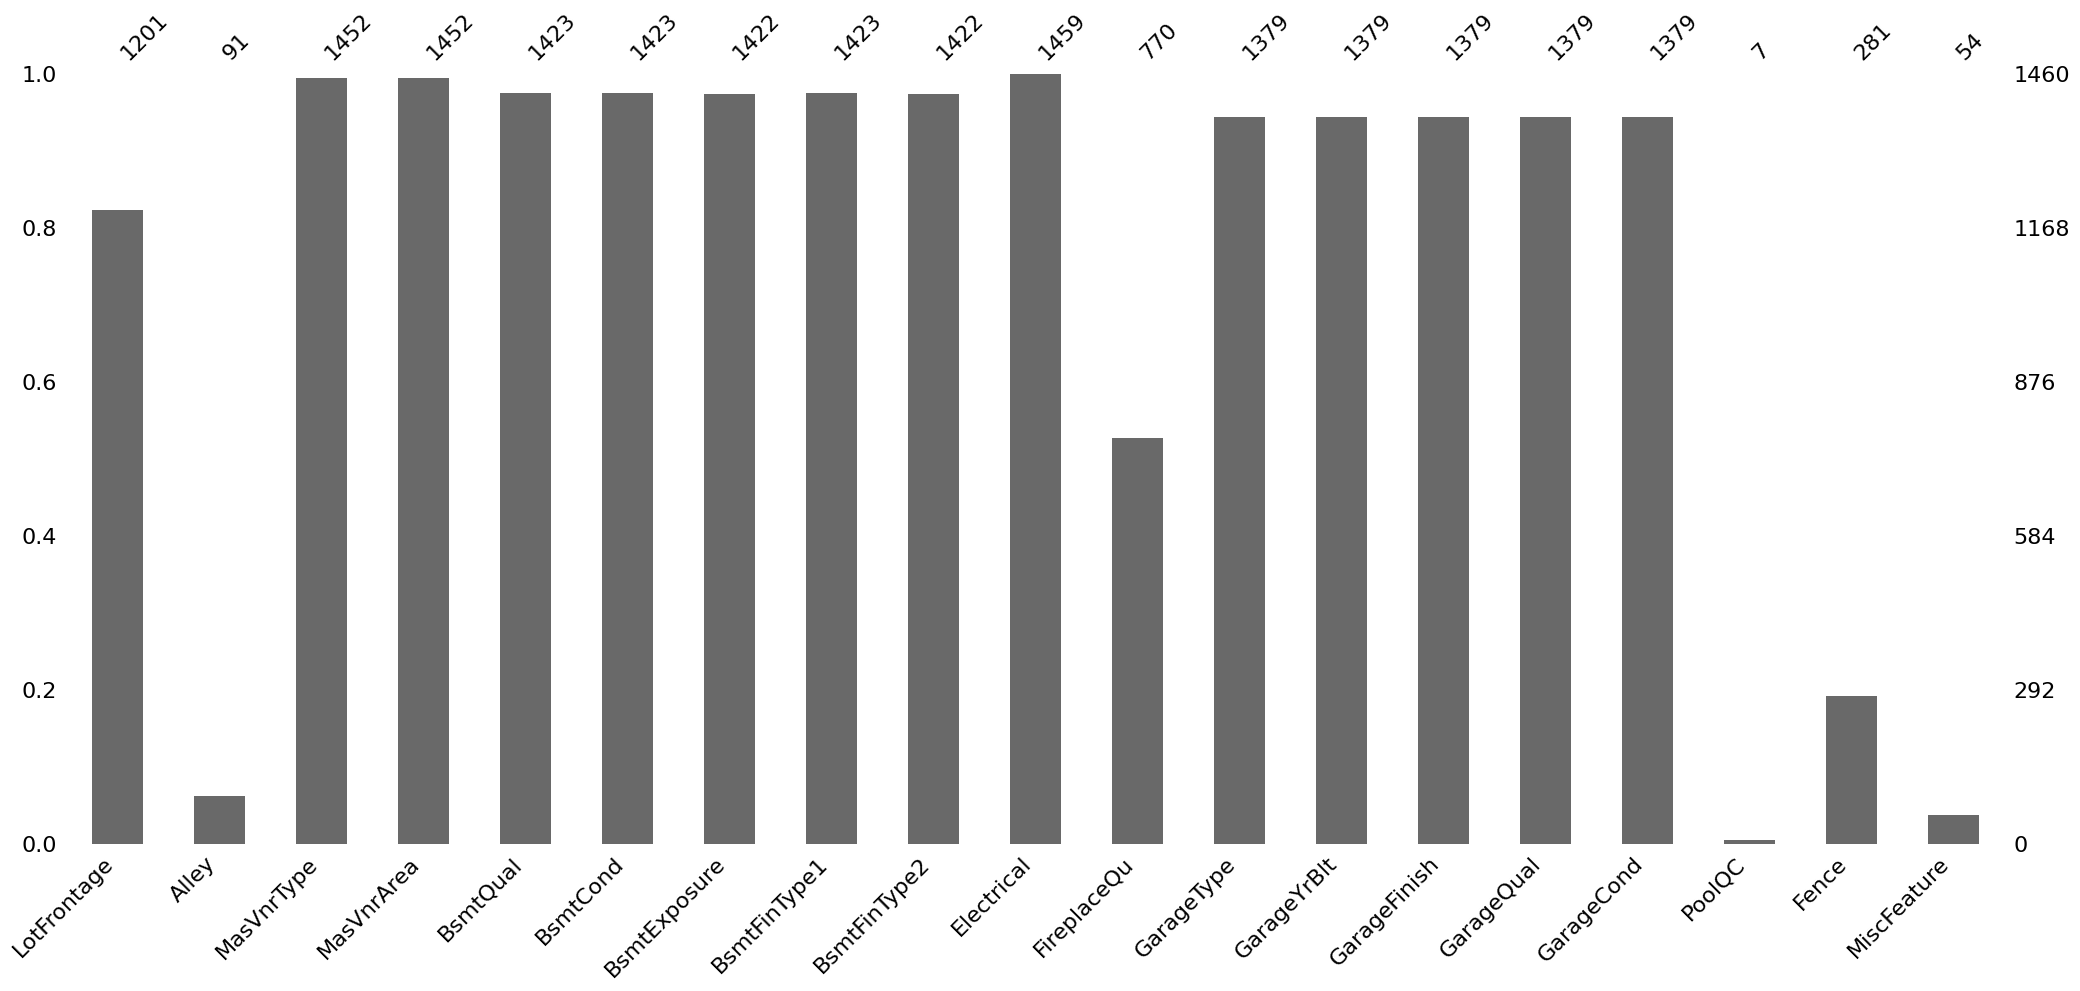

In [ ]:
#plot visualizing columns and total number of values in each column
msno.bar(house_data[col_list])

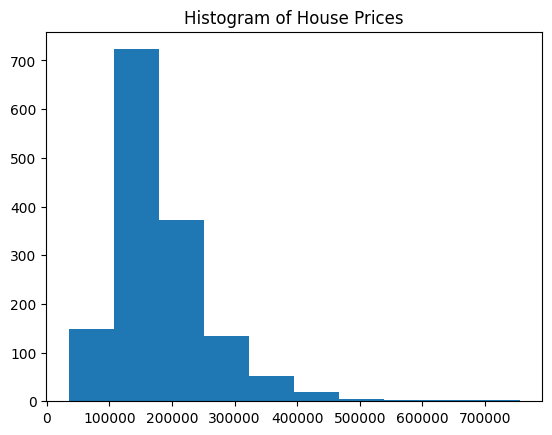

In [ ]:
#Histogram of SalePrice
plt.hist(house_data['SalePrice'])
plt.title('Histogram of House Prices')
plt.show()

In [ ]:
#calculate the skewness and kurtosis of SalePrice
print(house_data['SalePrice'].skew())
print(house_data['SalePrice'].kurtosis())

1.8828757597682129
6.536281860064529


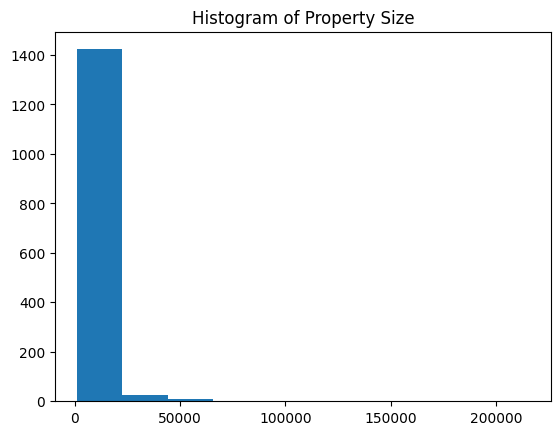

In [ ]:
#Histogram of LotArea
plt.hist(house_data['LotArea'])
plt.title('Histogram of Property Size')
plt.show()

In [ ]:
#calculate the skewness and kurtosis of LotArea
print(house_data['LotArea'].skew())
print(house_data['LotArea'].kurtosis())

12.207687851233496
203.24327101886033


In [ ]:
#box plot
px.box(house_data, x = 'BldgType', y = 'SalePrice', color = 'BldgType', points = 'outliers')

In [ ]:
#box plot
px.box(house_data, x = 'BldgType', y = 'LotArea', color = 'BldgType', points = 'outliers')

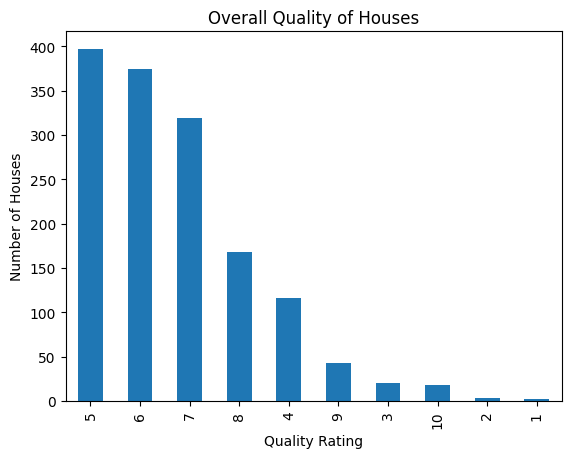

In [ ]:
#Bar Chart for Overall Quality (Categorical)
house_data['OverallQual'].value_counts().plot(kind='bar')
plt.title('Overall Quality of Houses')
plt.xlabel('Quality Rating')
plt.ylabel('Number of Houses')
plt.show()

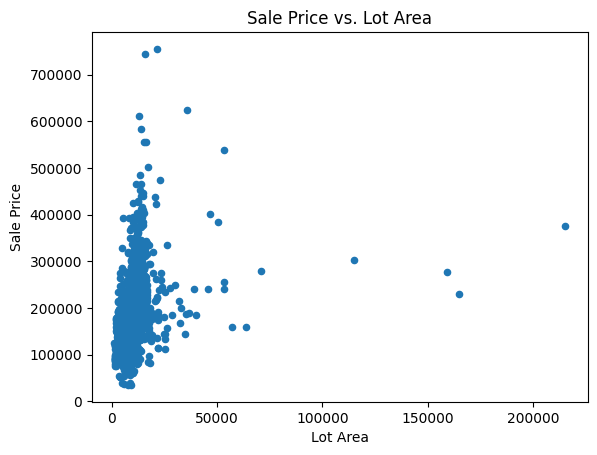

In [ ]:
#Scatter Plot for SalePrice vs. LotArea

house_data.plot(kind='scatter', x='LotArea', y='SalePrice')
plt.title('Sale Price vs. Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

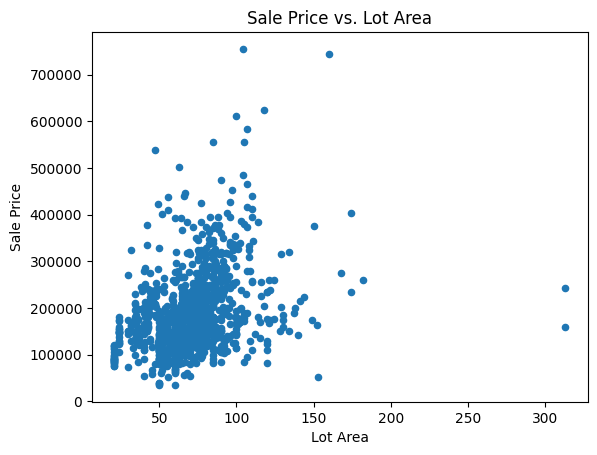

In [ ]:
#Scatter Plot for SalePrice vs. LotFrontage

house_data.plot(kind='scatter', x='LotFrontage', y='SalePrice')
plt.title('Sale Price vs. Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

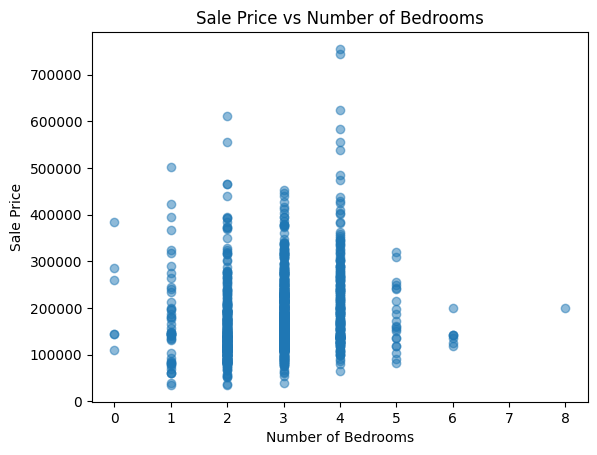

In [ ]:
#scatterplot sale price vs number of bedrooms

plt.scatter(house_data['BedroomAbvGr'], house_data['SalePrice'], alpha=0.5)
plt.title('Sale Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.show()

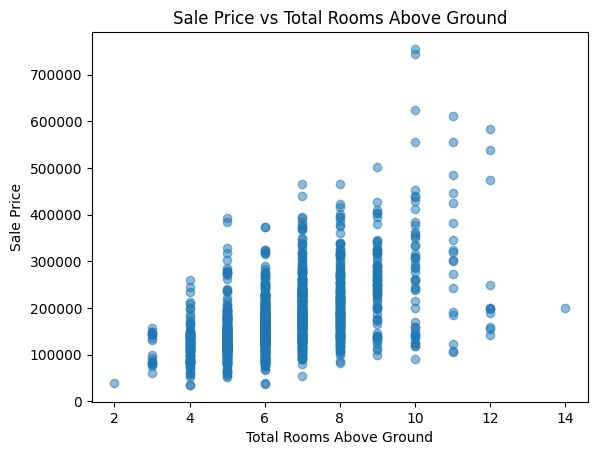

In [ ]:
#scatterpolot total rooms above ground vs  sale price

plt.scatter(house_data['TotRmsAbvGrd'], house_data['SalePrice'], alpha=0.5)
plt.title('Sale Price vs Total Rooms Above Ground')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price')
plt.show()

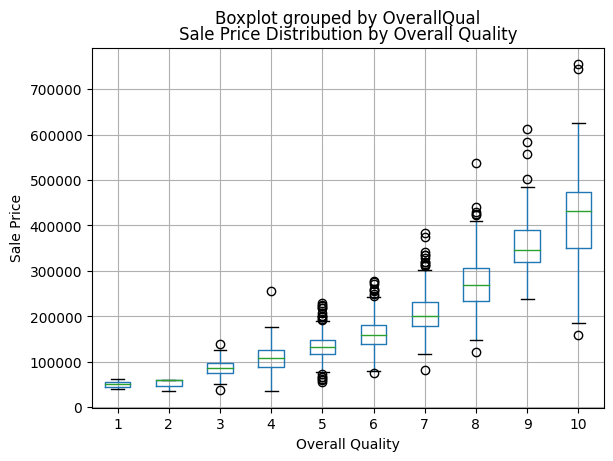

In [ ]:
#Boxplot for SalePrice across OverallQual
house_data.boxplot(column='SalePrice', by='OverallQual')
plt.title('Sale Price Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

<ipython-input-58-346a38734e98>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



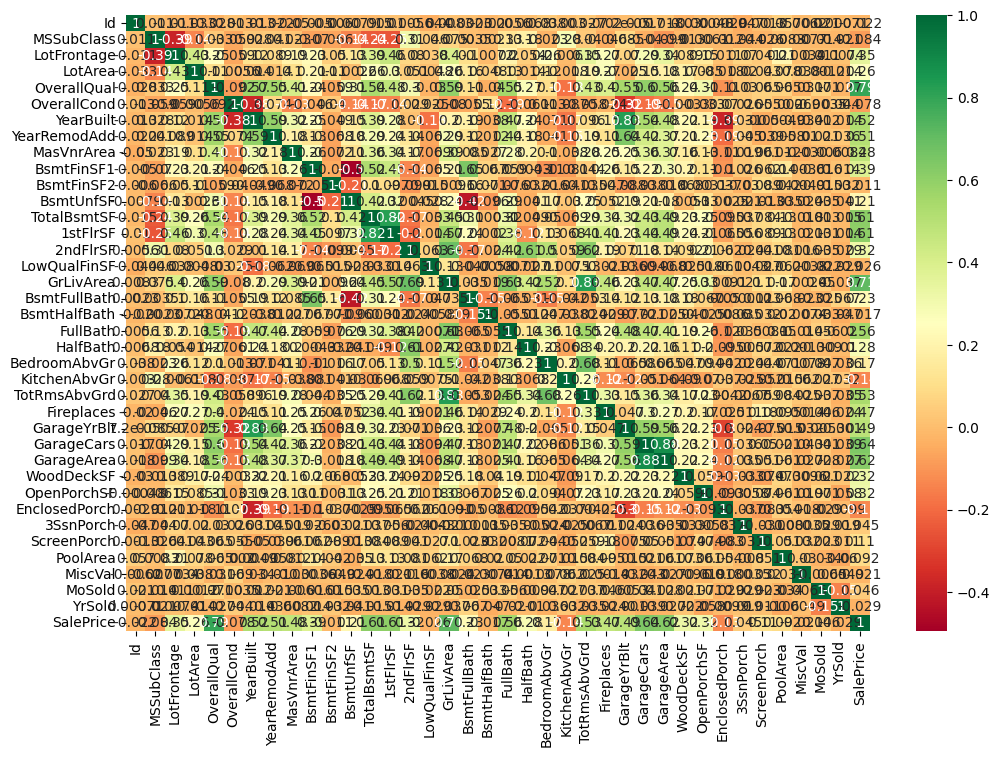

In [ ]:
#Heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(12, 8))
sns.heatmap(house_data.corr(), cmap='RdYlGn', annot=True)
plt.show()

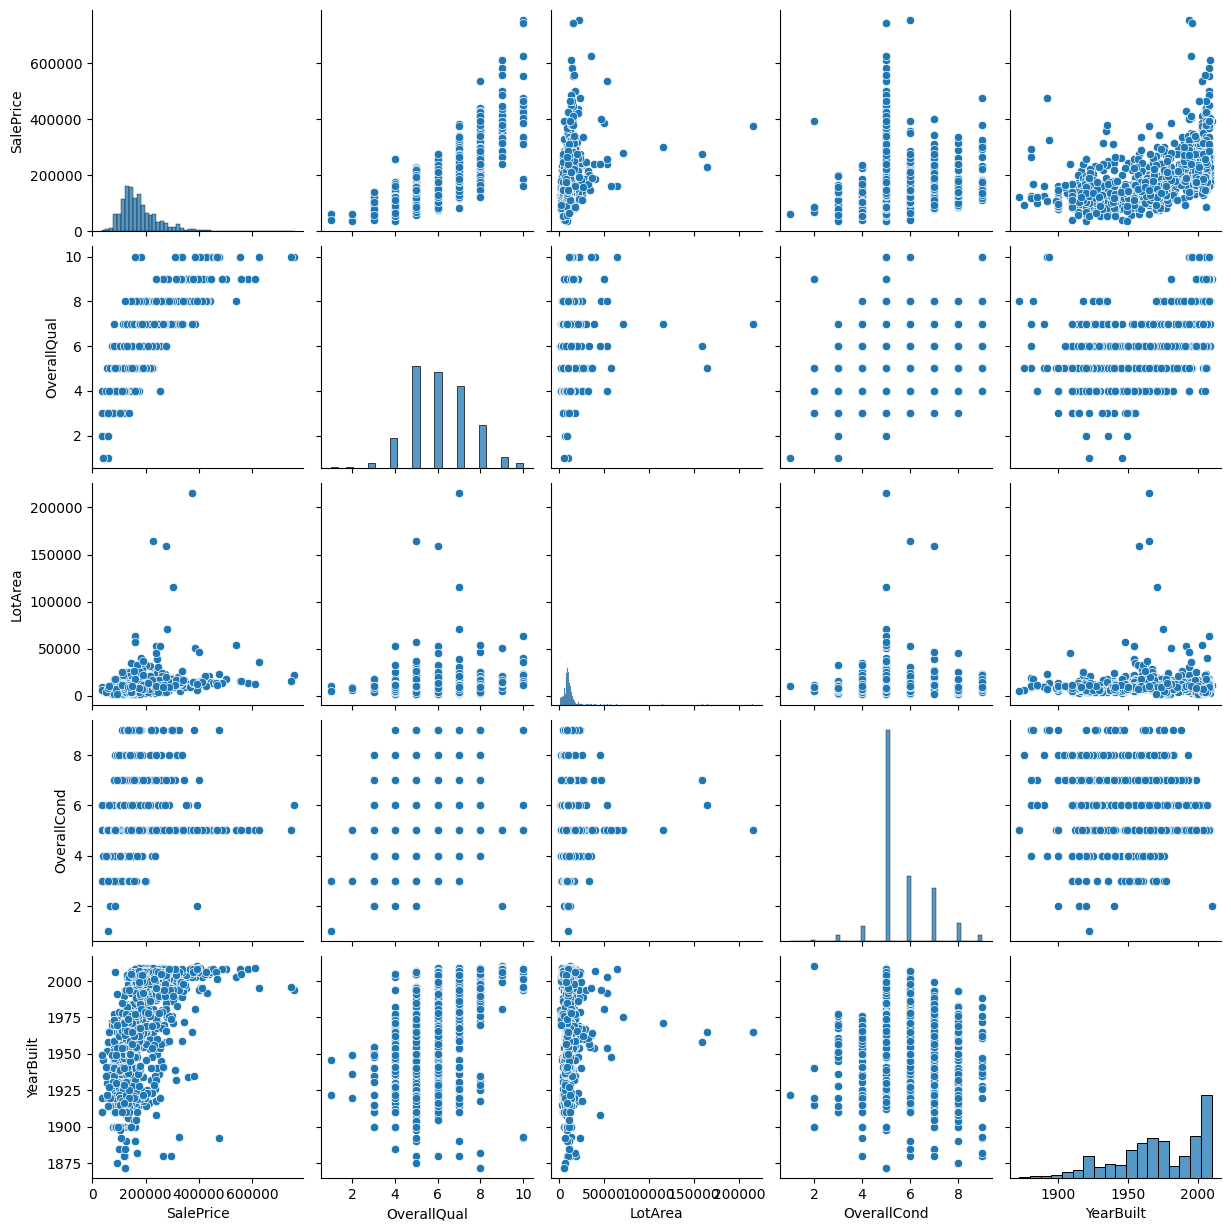

In [ ]:
#pairplot of multiple columns
sns.pairplot(house_data, vars=['SalePrice', 'OverallQual', 'LotArea', 'OverallCond', 'YearBuilt'])
plt.show()

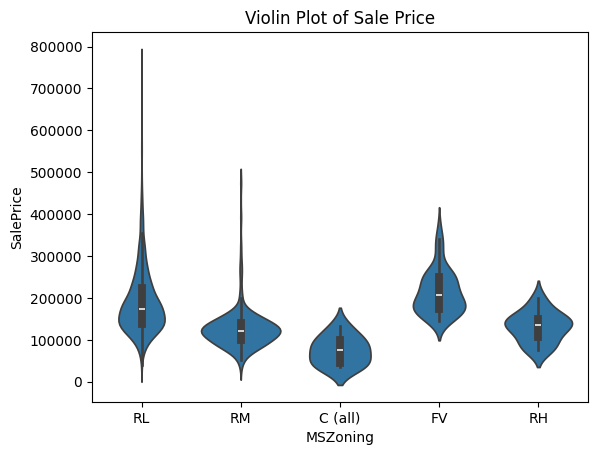

In [ ]:
## violin plot
sns.violinplot(x='MSZoning', y='SalePrice', color = '', data=house_data)
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.title('Violin Plot of Sale Price')
plt.show()

In [ ]:
#pivot table of price, with OverallQual as rows and Neighborhood as columns
pivot_table_1 = round(pd.pivot_table(house_data, values='SalePrice', index='OverallQual', columns='Neighborhood', aggfunc='mean'),2)

pivot_table_1

Neighborhood    Blmngtn   Blueste     BrDale    BrkSide    ClearCr    CollgCr  \
OverallQual                                                                     
1                   NaN       NaN        NaN   39300.00        NaN        NaN   
2                   NaN       NaN        NaN   60000.00        NaN        NaN   
3                   NaN       NaN        NaN   67000.00        NaN        NaN   
4                   NaN       NaN        NaN  100850.00  183977.33  123600.00   
5                   NaN       NaN  117000.00  124661.90  173083.33  134858.93   
6                   NaN  137500.0   98809.09  145843.06  209850.00  170100.92   
7             188660.29       NaN        NaN  172125.00  251433.33  209840.15   
8             223853.67       NaN        NaN        NaN        NaN  259875.78   
9                   NaN       NaN        NaN        NaN        NaN  279000.00   
10                  NaN       NaN        NaN        NaN        NaN        NaN   

Neighborhood    Crawfor    Edwards    Gilbert     IDOTRR    MeadowV  \
OverallQual                                                           
1                   NaN   61000.00        NaN        NaN        NaN   
2                   NaN        NaN        NaN   35311.00        NaN   
3                   NaN   85220.00        NaN   85666.67        NaN   
4             137500.00  111146.00  141000.00   84081.33   84150.00   
5             143853.36  123568.42  168713.33  105363.00  113816.67   
6             205859.16  149324.78  181463.85  116925.00  151400.00   
7             224850.00  152280.00  200723.86  154450.00        NaN   
8             312514.29        NaN  199300.00        NaN        NaN   
9                   NaN  320000.00  377500.00        NaN        NaN   
10                  NaN  172375.00        NaN        NaN        NaN   

Neighborhood    Mitchel      NAmes    NPkVill     NWAmes    NoRidge  \
OverallQual                                                           
1                   NaN        NaN        NaN        NaN        NaN   
2                   NaN        NaN        NaN        NaN        NaN   
3                   NaN   91300.00        NaN        NaN        NaN   
4             143250.00  114855.40        NaN        NaN        NaN   
5             136063.64  136948.54        NaN  160238.12        NaN   
6             160711.76  155056.76  142694.44  185316.67        NaN   
7             205164.33  203933.33        NaN  193944.23  266661.67   
8             271000.00  282666.67        NaN  268266.67  317604.17   
9                   NaN        NaN        NaN        NaN  333168.00   
10                  NaN        NaN        NaN        NaN  647875.00   

Neighborhood    NridgHt    OldTown      SWISU     Sawyer    SawyerW  \
OverallQual                                                           
1                   NaN        NaN        NaN        NaN        NaN   
2                   NaN        NaN   60000.00        NaN        NaN   
3                   NaN   98579.17        NaN        NaN        NaN   
4                   NaN   97754.18  126750.00  128217.67   94500.00   
5                   NaN  116244.26  150870.44  136432.09  137626.50   
6             195350.00  129836.55  139645.00  145581.82  159639.13   
7             210308.44  166579.94  165666.67        NaN  228427.62   
8             299460.59  150333.33        NaN        NaN  249620.00   
9             379258.58        NaN        NaN        NaN        NaN   
10            426195.12  400000.00        NaN        NaN        NaN   

Neighborhood    Somerst    StoneBr     Timber    Veenker  
OverallQual                                               
1                   NaN        NaN        NaN        NaN  
2                   NaN        NaN        NaN        NaN  
3                   NaN        NaN        NaN        NaN  
4                   NaN        NaN        NaN        NaN  
5                   NaN        NaN  182630.00  206000.00  
6             184048.45        NaN  175250.00  174000.0

In [ ]:
#pivot table of price, with BldgType as rows and ExterQual
pivot_table_2 = round(pd.pivot_table(house_data, values='SalePrice', index='BldgType', columns='ExterQual', aggfunc='mean'),2)

pivot_table_2

ExterQual         Ex         Fa         Gd         TA
BldgType                                             
1Fam       375278.11   72421.44  241077.12  147322.71
2fmCon           NaN  117500.00        NaN  130051.85
Duplex           NaN  110000.00        NaN  134002.67
Twnhs            NaN        NaN  170633.33  110912.00
TwnhsE     316465.00        NaN  194681.39  128887.14

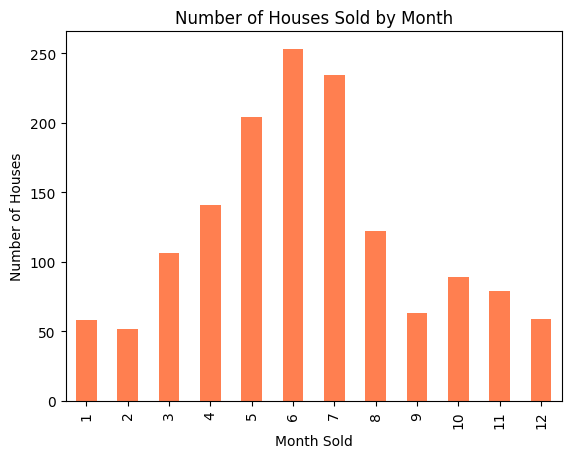

In [ ]:
#boxplot to show number of houses sold by month
sales_by_month = house_data.groupby('MoSold').size()
sales_by_month.plot(kind='bar', color='coral')
plt.title('Number of Houses Sold by Month')
plt.xlabel('Month Sold')
plt.ylabel('Number of Houses')
plt.show()

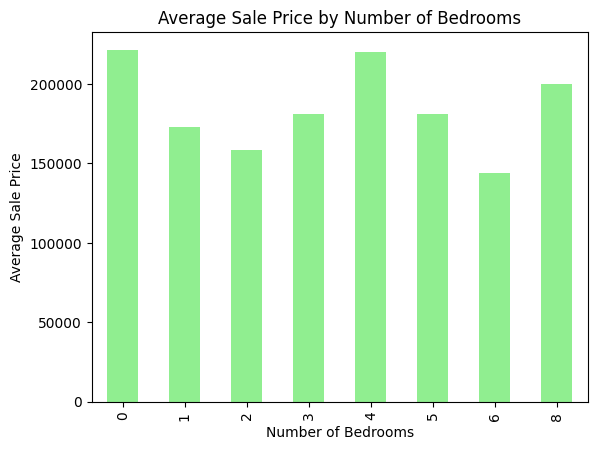

In [ ]:
#boxplot to show average sale price by bedrooms
avg_price_by_bedrooms = house_data.groupby('BedroomAbvGr')['SalePrice'].mean()
avg_price_by_bedrooms.plot(kind='bar', color='lightgreen')
plt.title('Average Sale Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sale Price')
plt.show()

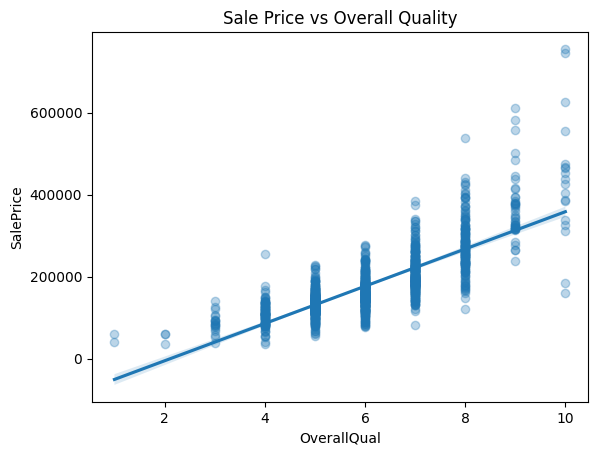

In [ ]:
#Regression plot of sales price vs overall quality

sns.regplot(x='OverallQual', y='SalePrice', data=house_data, scatter_kws={'alpha':0.3})
plt.title('Sale Price vs Overall Quality')
plt.show()

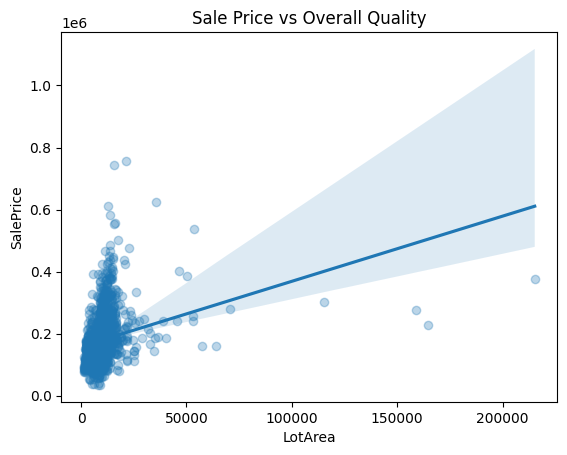

In [ ]:
#Regression plot of lot area vs sale price

sns.regplot(x='LotArea', y='SalePrice', data=house_data, scatter_kws={'alpha':0.3})
plt.title('Sale Price vs Overall Quality')
plt.show()

After looking at the visualizations, a number of red flags appear:

*   Outliers – it is clear after looking at the boxplots and the histograms that outliers are present in the dataset.
*   A number of numerical columns have to be saved as categorical columns including: MSSubClass, OverallQual, OverallCond, etc.
*   Missing Values – A number of columns contain missing values. The ones where over 60% are pure missing will have to be dropped.


## Data Pre-Processing (Luis, Dani, Efren) <a class="anchor" id="part2"></a>
In this step, we will handle data manipulation and make the dataset tidier. This will include excluding outliers from the dataset, imputing values when necessary, binning and normalization.

In [ ]:
#dropping outliers
#dropping houses that have over $500,000 listed
house_data_cleaned = house_data[house_data['SalePrice'] <= 500000]

#dropping houses that have over 50,000 in property size
house_data_cleaned = house_data[house_data['LotArea'] <= 50000]

print(house_data_cleaned.shape)
house_data_cleaned.head()

(1449, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
#dropping columns that have many outliers
house_data_cleaned = house_data_cleaned.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'])


In [ ]:
#dropping unnecessary columns that will not contribute to predictor 'SalePrice' LowQualFinSF
house_data_cleaned = house_data_cleaned.drop(columns = ['LowQualFinSF', 'Fireplaces', 'MiscVal', '3SsnPorch'])

In [ ]:
#converting boolean columns to int
columns_to_convert = ['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond']

house_data_cleaned[columns_to_convert] = house_data_cleaned[columns_to_convert].astype(object)

house_data_cleaned[columns_to_convert].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSSubClass   1449 non-null   object
 1   MoSold       1449 non-null   object
 2   OverallQual  1449 non-null   object
 3   OverallCond  1449 non-null   object
dtypes: object(4)
memory usage: 56.6+ KB


In [ ]:
#Fill the missing values of LotFrontage with average
house_data_cleaned['LotFrontage'].fillna(int(house_data_cleaned['LotFrontage'].mean()), inplace = True)

In [ ]:
#binning the values for price
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal')
house_data_cleaned['Price_binned'] = discretizer.fit_transform(house_data_cleaned[['SalePrice']])
house_data_cleaned[['SalePrice', 'Price_binned']].head()

SalePrice  Price_binned
0     208500           7.0
1     181500           6.0
2     223500           7.0
3     140000           3.0
4     250000           8.0

In [ ]:
#binning the values for LotArea
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal')
house_data_cleaned['Lot_binned'] = discretizer.fit_transform(house_data_cleaned[['LotArea']])
house_data_cleaned[['LotArea', 'Lot_binned']].head()

LotArea  Lot_binned
0     8450         3.0
1     9600         5.0
2    11250         7.0
3     9550         5.0
4    14260         9.0

In [ ]:
#encode categorical variables using one-hot encoding. All Columns must have numerical values after this step
house_data_cleaned = pd.get_dummies(house_data_cleaned, columns=['Street', 'LotShape', 'CentralAir'], prefix=['Street', 'LotShape', 'CentralAir'])
house_data_cleaned.head()

Id MSSubClass MSZoning  LotFrontage  LotArea LandContour Utilities  \
0   1         60       RL         65.0     8450         Lvl    AllPub   
1   2         20       RL         80.0     9600         Lvl    AllPub   
2   3         60       RL         68.0    11250         Lvl    AllPub   
3   4         70       RL         60.0     9550         Lvl    AllPub   
4   5         60       RL         84.0    14260         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0           7           5       2003          2003     Gable  CompShg   
1           6           8       1976          1976     Gable  CompShg   
2           7           5       2001          2002     Gable  CompShg   
3           7           5       1915          1970     Gable  CompShg   
4           8           5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0             8        Typ           0         NaN     Attchd       2003.0   
1             6        Typ           1          TA     Attchd       1976.0   
2             6        Typ           1          TA     Attchd       2001.0   
3             7        Typ           1          Gd     Detchd       1998.0   
4             9        Typ   

## Post Processing (Efren)<a class="anchor" id="part3"></a>

<ipython-input-47-e1a1d491f741>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_data.corr(), cmap='RdYlGn', annot=True)


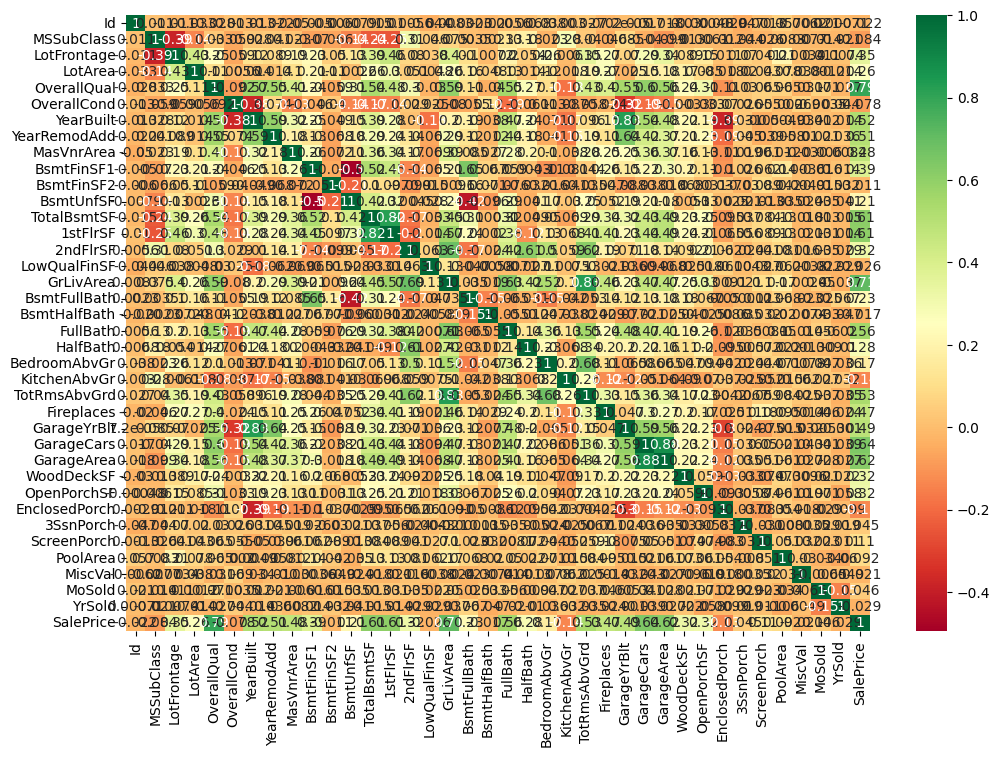

In [ ]:
## create a heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(12, 8))
sns.heatmap(house_data_cleaned.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [ ]:
# List of features to drop
features_to_drop = ['GarageCars', 'TotRmsAbvGrd', 'YearBuilt', '1stFlrSF', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

# Drop the features from the dataset
house_data_reduced = house_data_cleaned.drop(columns=features_to_drop)

# Display the first few rows of the updated dataset to confirm
house_data_reduced.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story            7            5          2003   
1       Norm     1Fam     1Story            6            8          1976   
2       Norm     1Fam     2Story            7            5          2002   
3       Norm     1Fam     2Story            7            5          1970   
4       Norm     1Fam     2Story            8            5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating HeatingQC  \
0         706          Unf           0        150    GasA        Ex   
1         978          Unf           0        284    GasA        Ex   
2         486          Unf           0        434    GasA        Ex   
3         216          Unf           0        540    GasA        Gd   
4         655          Unf           0        490    GasA        Ex   

  CentralAir Electrical  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0          Y      SBrkr       854             0             1             0   
1          Y      SBrkr         0             0             0             1   
2          Y      SBrkr       866             0             1             0   
3          Y      SBrkr       756             0             1             0   
4          Y      SBrkr      1053             0             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  \
0         2         1             3             1          Gd        Typ   
1         2         0             3             1          TA        Typ   
2         2         1             3             1          Gd        Typ   
3         1         0             3             1          Gd        Typ   
4         2         1             4             1          Gd        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
0           0         NaN     Attchd          RFn         TA         TA   
1           1          TA     Attchd          RFn         TA         TA   
2           1          TA     Attchd          RFn         TA         TA   
3           1          Gd     Detchd          Unf         TA         TA   
4           1          TA     At

Features identified for dropping due to high collinearity:
1. 'GarageCars' and 'GarageArea' are both indicators of garage size which means that there can be a high correlation between them that can lead to multicollinearity issues.
2. 'TotRmsAbvGrd' and 'GrLivArea' are both related to the overall size of the house so we can drop one.
3. '1stFlrSF' and 'TotalBsmtSF' might be closely related as they both indicate size on the first floor, therefore, we can drop one.
4. 'YearBuilt' and 'GarageYrBlt' are likely correlated since garages are often built at the same time as the house so we do not need both of them.

In [ ]:
# descriptive stats after dropping the featuers greater than 1
house_data_reduced.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean      5.575342   1984.865753   103.685262   443.639726    46.549315   
std       1.112799     20.645407   181.066207   456.098091   161.319273   
min       1.000000   1950.000000     0.000000     0.000000     0.000000   
25%       5.000000   1967.000000     0.000000     0.000000     0.000000   
50%       5.000000   1994.000000     0.000000   383.500000     0.000000   
75%       6.000000   2004.000000   166.000000   712.250000     0.000000   
max       9.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF     2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean    567.240411   346.992466      5.844521      0.425342      0.057534   
std     441.866955   436.528436     48.623081      0.518911      0.238753   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%     223.000000     0.000000      0.000000      0.000000      0.000000   
50%     477.500000     0.000000      0.000000      0.000000      0.000000   
75%     808.000000   728.000000      0.000000      1.000000      0.000000   
max    2336.000000  2065.000000    572.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr   Fireplaces  \
count  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean      1.565068     0.382877      2.866438      1.046575     0.613014   
std       0.550916     0.502885      0.815778      0.220338     0.644666   
min       0.000000     0.000000      0.000000      0.000000     0.000000   
25%       1.000000     0.000000      2.000000      1.000000     0.000000   
50%       2.000000     0.000000      3.000000      1.000000     1.000000   
75%       2.000000     1.000000      3.000000      1.000000     1.000000   
max       3.000000     2.000000      8.000000      3.000000     3.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000 

In [ ]:
house_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<ipython-input-19-6bd7b76cee42>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_data_reduced.corr(), cmap='RdYlGn', annot=True)


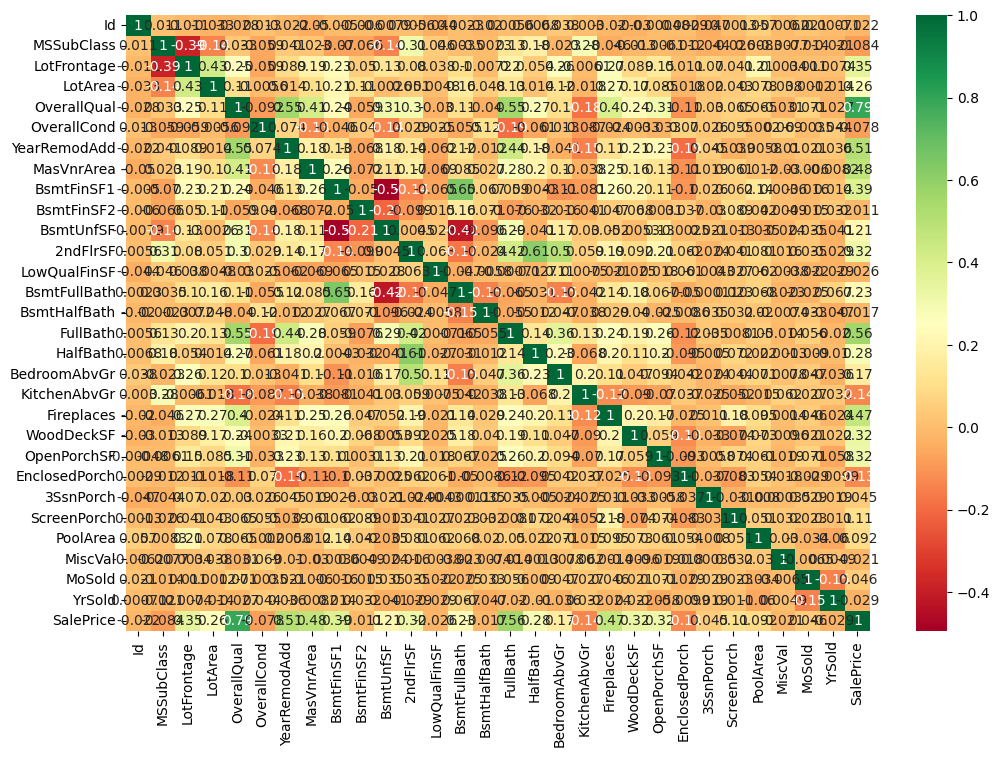

In [ ]:
## create a heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(12, 8))
sns.heatmap(house_data_reduced.corr(), cmap='RdYlGn', annot=True)
plt.show()